#                              Telecom Churn Case Study

### Business Objective:-

__Predict the customer churn based on the data (features) from the previous three months by understanding the typical customer__
__Below mentioned are the high level steps/approach that we would follow in predicting the churn inline with the Business objective:-__

- Missing data handling.
- Scale and apply PCA 
- Logistic regresesion with RFE
- Since the churn popiulation is too low - we will be balancing the class by using "Class Weight = Balanced" in all the models

#### Import all necessary modules

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA 

In [2]:
df=pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

__Missing value adjustment as suggested by Upgrad Mail__

In [3]:
df['last_date_of_month_7'].fillna(value='7/31/2014', inplace= True)
df['last_date_of_month_8'].fillna(value='8/31/2014', inplace= True)
df['last_date_of_month_9'].fillna(value='9/30/2014', inplace= True)
df['night_pck_user_6'].fillna(value=-1, inplace= True)
df['night_pck_user_7'].fillna(value=-1, inplace= True)
df['night_pck_user_8'].fillna(value=-1, inplace= True)
df['night_pck_user_9'].fillna(value=-1, inplace= True)
df['fb_user_6'].fillna(value=-1, inplace= True)
df['fb_user_7'].fillna(value=-1, inplace= True)
df['fb_user_8'].fillna(value=-1, inplace= True)
df['fb_user_9'].fillna(value=-1, inplace= True)

###  Finding the High value customer pupulation and churn rate
__Identify those customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)__

In [4]:
df['goodTR']=(df['total_rech_amt_6']+df['total_rech_amt_7'])*.5
n=df['goodTR'].quantile(.7)
n

368.5

In [5]:
hvdf=df.loc[df['goodTR']>=n]
hvdf.shape

(30011, 227)

In [6]:
churn = hvdf.apply(lambda x:1 if (x['total_ic_mou_9'] +x['total_og_mou_9']+x['vol_2g_mb_9']+x['vol_3g_mb_9'])==0 else 0, axis =1)

In [7]:
hvdf['churn']=churn
(hvdf['churn'].sum()/len(hvdf)).round(3)

0.086

__8.6% is the High value customer percentage from the total population__

__Remove data for month of september as it conmtains data of customers that have churned__

In [8]:
sep= pd.DataFrame(hvdf.columns)
sep.columns=['feature']
sep['last']=sep['feature'].apply(lambda x: str(x).split('_')[-1])
sep1=sep.loc[(sep['last'] == '9')]
for x in sep1.feature:
    hvdf.drop(x, axis =1, inplace = True)

### Replace all NAN values with 0

In [9]:
hvdf.fillna(value=0, inplace=True)
hvdf.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,goodTR,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.

### Dropping the columns that are irrelvant,having no variance and insignificant

In [10]:
hvdf.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','date_of_last_rech_data_6',
           'date_of_last_rech_data_7','date_of_last_rech_data_8','goodTR',
          'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','sep_vbc_3g'], axis=1, inplace = True)
hvdf.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,31

### Converting date to numerical value

In [11]:
hvdf['date_of_last_rech_6']=hvdf['date_of_last_rech_6'].map(lambda x: 1 if x!=0 else 0)
hvdf['date_of_last_rech_7']=hvdf['date_of_last_rech_7'].map(lambda x: 1 if x!=0 else 0)
hvdf['date_of_last_rech_8']=hvdf['date_of_last_rech_8'].map(lambda x: 1 if x!=0 else 0)

### Replacing Categorical variables with Churm Rate as per the recommendation in the Case study

In [12]:
#Replacing categorical varibles with churn rate for fb_user_6
df_fbUser6 = hvdf.groupby('fb_user_6')
lenChurn = len(hvdf['churn'])
totalChurn = df_fbUser6['churn'].sum()
churn_ratefb6 = totalChurn/((lenChurn-totalChurn) + totalChurn)

churn_ratefb6 = churn_ratefb6.reset_index()
hvdf['fb_user_6'].replace(-1.0, churn_ratefb6['churn'][0],inplace=True)
hvdf['fb_user_6'].replace(0.0, churn_ratefb6['churn'][1],inplace=True)
hvdf['fb_user_6'].replace(1.0, churn_ratefb6['churn'][2],inplace=True)


#Replacing categorical varibles with churn rate for fb_user_7
df_fbUser7 = hvdf.groupby('fb_user_7')
lenChurn7 = len(hvdf['churn'])
totalChurn7 = df_fbUser7['churn'].sum()
churn_ratefb7 = totalChurn7/((lenChurn7-totalChurn7) + totalChurn7)

churn_ratefb7 = churn_ratefb7.reset_index()
churn_ratefb7
hvdf['fb_user_7'].replace(-1.0, churn_ratefb7['churn'][0],inplace=True)
hvdf['fb_user_7'].replace(0.0, churn_ratefb7['churn'][1],inplace=True)
hvdf['fb_user_7'].replace(1.0, churn_ratefb7['churn'][2],inplace=True)



#Replacing categorical varibles with churn rate for fb_user_8
df_fbUser8 = hvdf.groupby('fb_user_8')
lenChurn8 = len(hvdf['churn'])
totalChurn8 = df_fbUser8['churn'].sum()
churn_ratefb8 = totalChurn8/((lenChurn8-totalChurn8) + totalChurn8)

churn_ratefb8 = churn_ratefb8.reset_index()
hvdf['fb_user_8'].replace(-1.0, churn_ratefb8['churn'][0],inplace=True)
hvdf['fb_user_8'].replace(0.0, churn_ratefb8['churn'][1],inplace=True)
hvdf['fb_user_8'].replace(1.0, churn_ratefb8['churn'][2],inplace=True)


#Replacing categorical varibles with churn rate for night_pck_user_6
df_nightPckUser6= hvdf.groupby('night_pck_user_6')
len_nightPckUser6 = len(hvdf['churn'])
total_nightPckUser6 = df_nightPckUser6['churn'].sum()
churn_nightPckUser6 = total_nightPckUser6/((len_nightPckUser6-total_nightPckUser6) + total_nightPckUser6)

churn_nightPckUser6 = churn_nightPckUser6.reset_index()
hvdf['night_pck_user_6'].replace(-1.0, churn_nightPckUser6['churn'][0],inplace=True)
hvdf['night_pck_user_6'].replace(0.0, churn_nightPckUser6['churn'][1],inplace=True)
hvdf['night_pck_user_6'].replace(1.0, churn_nightPckUser6['churn'][2],inplace=True)


#Replacing categorical varibles with churn rate for night_pck_user_7

df_nightPckUser7= hvdf.groupby('night_pck_user_7')
len_nightPckUser7 = len(hvdf['churn'])
total_nightPckUser7 = df_nightPckUser7['churn'].sum()
churn_nightPckUser7 = total_nightPckUser7/((len_nightPckUser7-total_nightPckUser7) + total_nightPckUser7)

churn_nightPckUser7 = churn_nightPckUser7.reset_index()
hvdf['night_pck_user_7'].replace(-1.0, churn_nightPckUser7['churn'][0],inplace=True)
hvdf['night_pck_user_7'].replace(0.0, churn_nightPckUser7['churn'][1],inplace=True)
hvdf['night_pck_user_7'].replace(1.0, churn_nightPckUser7['churn'][2],inplace=True)


#Replacing categorical varibles with churn rate for night_pck_user_8
df_nightPckUser8= hvdf.groupby('night_pck_user_8')
len_nightPckUser8 = len(hvdf['churn'])
total_nightPckUser8 = df_nightPckUser8['churn'].sum()
churn_nightPckUser8 = total_nightPckUser8/((len_nightPckUser8-total_nightPckUser8) + total_nightPckUser8)

churn_nightPckUser8 = churn_nightPckUser8.reset_index()
hvdf['night_pck_user_8'].replace(-1.0, churn_nightPckUser8['churn'][0],inplace=True)
hvdf['night_pck_user_8'].replace(0.0, churn_nightPckUser8['churn'][1],inplace=True)
hvdf['night_pck_user_8'].replace(1.0, churn_nightPckUser8['churn'][2],inplace=True)


#Replacing categorical varibles with churn rate for date_of_last_rech_6
df_dateoflastrech6= hvdf.groupby('date_of_last_rech_6')
len_dateoflastrech6 = len(hvdf['churn'])
total_dateoflastrech6 = df_dateoflastrech6['churn'].sum()
churn_dateoflastrech6 = total_dateoflastrech6/((len_dateoflastrech6-total_dateoflastrech6) + total_dateoflastrech6)

churn_dateoflastrech6 = churn_dateoflastrech6.reset_index()
hvdf['date_of_last_rech_6'].replace(-1.0, churn_dateoflastrech6['churn'][0],inplace=True)
hvdf['date_of_last_rech_6'].replace(0.0, churn_dateoflastrech6['churn'][1],inplace=True)



#Replacing categorical varibles with churn rate for date_of_last_rech_7
df_dateoflastrech7= hvdf.groupby('date_of_last_rech_7')
len_dateoflastrech7 = len(hvdf['churn'])
total_dateoflastrech7 = df_dateoflastrech7['churn'].sum()
churn_dateoflastrech7 = total_dateoflastrech7/((len_dateoflastrech7-total_dateoflastrech7) + total_dateoflastrech7)

churn_dateoflastrech7 = churn_dateoflastrech7.reset_index()
hvdf['date_of_last_rech_7'].replace(-1.0, churn_dateoflastrech7['churn'][0],inplace=True)
hvdf['date_of_last_rech_7'].replace(0.0, churn_dateoflastrech7['churn'][1],inplace=True)


#Replacing categorical varibles with churn rate for date_of_last_rech_8
df_dateoflastrech8= hvdf.groupby('date_of_last_rech_8')
len_dateoflastrech8 = len(hvdf['churn'])
total_dateoflastrech8 = df_dateoflastrech8['churn'].sum()
churn_dateoflastrech8 = total_dateoflastrech8/((len_dateoflastrech8-total_dateoflastrech8) + total_dateoflastrech8)

churn_dateoflastrech8 = churn_dateoflastrech8.reset_index()
hvdf['date_of_last_rech_8'].replace(-1.0, churn_dateoflastrech8['churn'][0],inplace=True)
hvdf['date_of_last_rech_8'].replace(0.0, churn_dateoflastrech8['churn'][1],inplace=True)

### Since data for both the 6th and 7th months are of the same nature indicating a period of "Good Time",we have taken the average of columns for the 6th and the 7th month.

In [13]:
hvdf['arpu_g']=(hvdf['arpu_6']+hvdf['arpu_7'])/2
hvdf['onnet_mou_g']=(hvdf['onnet_mou_6']+hvdf['onnet_mou_7'])/2
hvdf['offnet_mou_g']=(hvdf['offnet_mou_6']+hvdf['offnet_mou_7'])/2
hvdf['offnet_mou_g']=(hvdf['offnet_mou_6']+hvdf['offnet_mou_7'])/2
hvdf['roam_ic_mou_g']=(hvdf['roam_ic_mou_6']+hvdf['roam_ic_mou_7'])/2
hvdf['roam_og_mou_g']=(hvdf['roam_og_mou_6']+hvdf['roam_og_mou_7'])/2
hvdf['total_og_mou_g']=(hvdf['total_og_mou_6']+hvdf['total_og_mou_7'])/2
hvdf['total_ic_mou_g']=(hvdf['total_ic_mou_6']+hvdf['total_ic_mou_7'])/2
hvdf['total_rech_num_g']=(hvdf['total_rech_num_6']+hvdf['total_rech_num_7'])/2
hvdf['total_rech_amt_g']=(hvdf['total_rech_amt_6']+hvdf['total_rech_amt_7'])/2
hvdf['max_rech_amt_g']=(hvdf['max_rech_amt_6']+hvdf['max_rech_amt_7'])/2
hvdf['date_of_last_rech_g']=(hvdf['date_of_last_rech_6']+hvdf['date_of_last_rech_7'])/2
hvdf['last_day_rch_amt_g']=(hvdf['last_day_rch_amt_6']+hvdf['last_day_rch_amt_7'])/2
hvdf['total_rech_data_g']=(hvdf['total_rech_data_6']+hvdf['total_rech_data_7'])/2
hvdf['max_rech_data_g']=(hvdf['max_rech_data_6']+hvdf['max_rech_data_7'])/2
hvdf['count_rech_2g_g']=(hvdf['count_rech_2g_6']+hvdf['count_rech_2g_7'])/2
hvdf['av_rech_amt_data_g']=(hvdf['av_rech_amt_data_6']+hvdf['av_rech_amt_data_7'])/2
hvdf['vol_2g_mb_g']=(hvdf['vol_2g_mb_6']+hvdf['vol_2g_mb_7'])/2
hvdf['vol_3g_mb_g']=(hvdf['vol_3g_mb_6']+hvdf['vol_3g_mb_7'])/2
hvdf['arpu_3g_g']=(hvdf['arpu_3g_6']+hvdf['arpu_3g_7'])/2
hvdf['arpu_2g_g']=(hvdf['arpu_2g_6']+hvdf['arpu_2g_7'])/2
hvdf['night_pck_user_g']=(hvdf['night_pck_user_6']+hvdf['night_pck_user_7'])/2
hvdf['monthly_2g_g']=(hvdf['monthly_2g_6']+hvdf['monthly_2g_7'])/2
hvdf['sachet_2g_g']=(hvdf['sachet_2g_6']+hvdf['sachet_2g_7'])/2
hvdf['monthly_3g_g']=(hvdf['monthly_3g_6']+hvdf['monthly_3g_7'])/2
hvdf['sachet_3g_g']=(hvdf['sachet_3g_6']+hvdf['sachet_3g_7'])/2
hvdf['fb_user_g']=(hvdf['fb_user_6']+hvdf['fb_user_7'])/2
hvdf['good_vbc_3g']=(hvdf['jun_vbc_3g']+hvdf['jul_vbc_3g'])/2

### Further removing the columns below since we have already clubbed all the columns for voice into a single column 

In [14]:
hvcdf=hvdf.loc[:,~hvdf.columns.str.contains("std|loc|isd|spl|og_others|ic_others|jun|jul")]

In [15]:
hvcdf.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,churn,arpu_g,onnet_mou_g,offnet_mou_g,roam_ic_mou_g,roam_og_mou_g,total_og_mou_g,total_ic_mou_g,total_rech_num_g,total_rech_amt_g,max_rech_amt_g,date_of_last_rech_g,last_day_rch_amt_g,total_rech_data_g,max_rech_data_g,count_rech_2g_g,av_rech_amt_data_g,vol_2g_mb_g,vol_3g_mb_g,arpu_3g_g,arpu_2g_g,night_pck_user_g,monthly_2g_g,sachet_2g_g,monthly_3g_g,sachet_3g_g,fb_user_g,good_vbc_3g
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,1580,790,1580,1.0,1.0,1.0,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.061544,0.065209,0.074806,0,0,0,0,0,0,0,0,0,0,0,0,0.061544,0.065209,0.074806,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,548.385,592.250,5.0,1185.0,1185.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.063377,0.0,0.0,0.0,0.0,0.063377,19.060
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,90,154,30,1.0,1.0,1.0,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.061544,0.020559,0.011329,0,1,0,0,1,3,0,0,0,0,0,0,0.061544,0.018493,0.007664,315,21.03,0,435.4720,382.360,87.645,0.000,0.000,470.010,66.175,20.0,519.0,122.0,1.0,25.0,1.0,77.0,1.0,88.5,178.0,375.475,0.0,0.0,0.041052,0.5,0.5,0.0,0.0,0.040019,516.405
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,907.09,192.41,1015.26,968.61,172.58,1144.53,6,4,11,507,253,717,110,110,130,1.0,1.0,1.0,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.2,0.061544,0.065209,0.011329,0,0,0,0,0,3,0,0,0,0,0,0,0.061544,0.065209,0.007664,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,549.750,570.595,5.0,380.0,110.0,1.0,80.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.063377,0.0,0.0,0.0,0.0,0.063377,0.000
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,346.81,286.01,233.38,364.86,381.56,294.46,10,6,2,570,348,160,110,110,130,1.0,1.0,1.0,100,100,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.061544,0.065209,0.074806,0,0,0,0,0,0,0,0,0,0,0,0,0.061544,0.065209,0.074806,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,316.410,373.210,8.0,459.0,110.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.063377,0.0,0.0,0.0,0.0,0.063377,12.170
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,1249.53,0.81,0.00,91.88,2.31,0.00,19,2,4,816,0,30,110,0,30,1.0,1

### Clubbing the columns for the 6th and 7th month into a single column "good" and dropping the original columns for the 6th and 7th month

In [16]:
good= pd.DataFrame(hvcdf.columns)
good.columns=['feature']
good['last']=good['feature'].apply(lambda x: str(x).split('_')[-1])
good1=good.loc[(good['last'] == '6')]
good2=good.loc[(good['last'] == '7')]
for y in good1.feature:
    hvcdf.drop(y, axis =1, inplace = True)
for z in good2.feature:
    hvcdf.drop(z, axis =1, inplace = True)
hvcdf.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,total_og_mou_8,total_ic_mou_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8,aon,aug_vbc_3g,churn,arpu_g,onnet_mou_g,offnet_mou_g,roam_ic_mou_g,roam_og_mou_g,total_og_mou_g,total_ic_mou_g,total_rech_num_g,total_rech_amt_g,max_rech_amt_g,date_of_last_rech_g,last_day_rch_amt_g,total_rech_data_g,max_rech_data_g,count_rech_2g_g,av_rech_amt_data_g,vol_2g_mb_g,vol_3g_mb_g,arpu_3g_g,arpu_2g_g,night_pck_user_g,monthly_2g_g,sachet_2g_g,monthly_3g_g,sachet_3g_g,fb_user_g,good_vbc_3g
7,7000701601,3171.480,52.29,325.91,31.64,38.06,350.16,428.74,7,3638,1580,1.0,779,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.074806,0,0,0,0,0.074806,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,548.385,592.250,5.0,1185.0,1185.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.063377,0.0,0.0,0.0,0.0,0.063377,19.060
8,7001524846,137.362,35.08,136.48,0.00,0.00,171.56,16.54,14,120,30,1.0,10,3.0,23.0,3.0,0.0,69.0,0.03,11.94,19.83,0.0,0.011329,0,3,0,0,0.007664,315,21.03,0,435.4720,382.360,87.645,0.000,0.000,470.010,66.175,20.0,519.0,122.0,1.0,25.0,1.0,77.0,1.0,88.5,178.0,375.475,0.0,0.0,0.041052,0.5,0.5,0.0,0.0,0.040019,516.405
13,7002191713,593.260,534.24,482.46,72.11,1.44,1015.26,1144.53,11,717,130,1.0,0,3.0,23.0,3.0,0.0,69.0,0.02,0.00,0.00,0.2,0.011329,0,3,0,0,0.007664,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,549.750,570.595,5.0,380.0,110.0,1.0,80.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.063377,0.0,0.0,0.0,0.0,0.063377,0.000
16,7000875565,187.894,70.61,162.76,0.00,0.00,233.38,294.46,2,160,130,1.0,130,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.074806,0,0,0,0,0.074806,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,316.410,373.210,8.0,459.0,110.0,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.063377,0.0,0.0,0.0,0.0,0.063377,12.170
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,4,30,30,1.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.074806,0,0,0,0,0.074806,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,625.170,47.095,10.5,408.0,55.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.063377,0.0,0.0,0.0,0.0,0.063377,0.000


In [17]:
hvcdf['std_og_t2c_mou_8']=hvdf['std_og_t2c_mou_8']
hvcdf['loc_og_t2c_mou_8']=hvdf['loc_og_t2c_mou_8']
hvcdf['std_og_t2c_mou_6-7']=(hvdf['std_og_t2c_mou_6']+hvdf['std_og_t2c_mou_7'])*0.5
hvcdf['loc_og_t2c_mou_6-7']=(hvdf['loc_og_t2c_mou_6']+hvdf['loc_og_t2c_mou_7'])*0.5

# PART-1

### Exploratory Data Analysis to get a feel of the data,the correlation between predictors and relationship between the dependent and independent variables

### Plotting a heatmap to find the correlation matrix

In [18]:
cor =hvcdf.loc[:,['arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'total_og_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'total_rech_data_8',
       'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8',
       'arpu_2g_8', 'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'fb_user_8']]


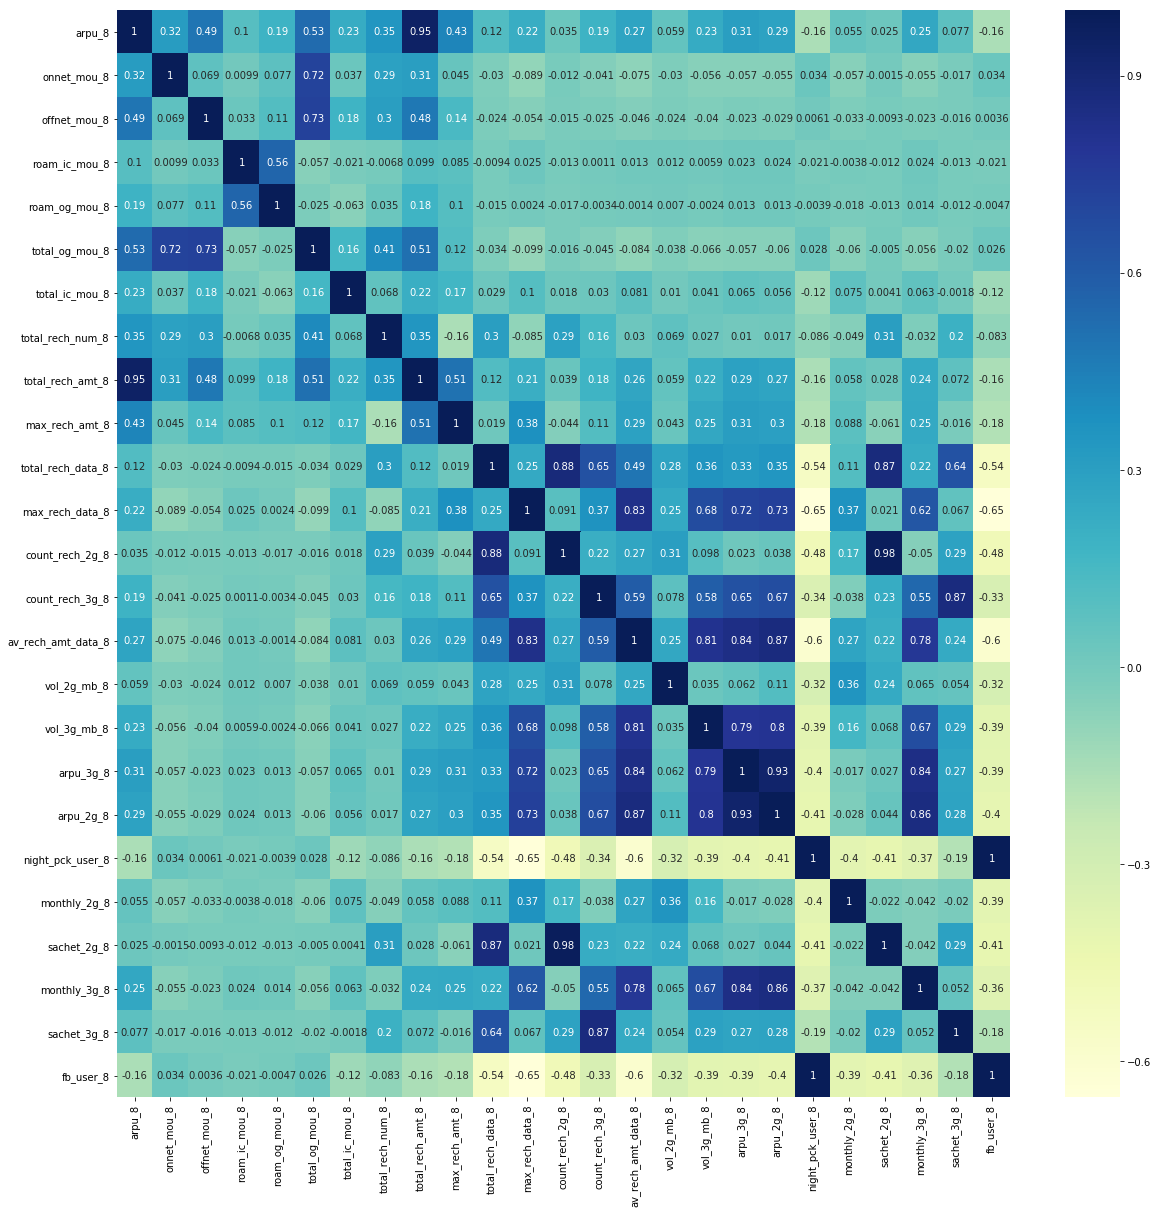

In [19]:
# figure size
plt.figure(figsize=(20,20))

# heatmap
sns.heatmap(cor.corr(), cmap="YlGnBu", annot=True)


## Observations/Inference from the above heatmap

#### 1)fb_user_8 and night_pk_user_8 are highly correlated i.e correlation of 1, so all night pack users are fb pack users.
#### 2)count_rech_2g_8 and sachet_2g_8 are highly correlated i.e. 0.98 sachet buys means more 2g recharge.

## There are few very highly correlated fields but we shall leave it to RFE and PCA to handle them.

### Merging the columns for incoming and outgoing for call and data usage per minuite for both the "good times" phase as well as the "action" phase and dropping the original columns

In [20]:
hvcdf['roam_mou_8']= hvcdf['roam_ic_mou_8']+hvcdf['roam_og_mou_8']
hvcdf['voice_mou_8']= hvcdf['total_og_mou_8']+hvcdf['total_ic_mou_8']
hvcdf['monthly_2_3g_8']= hvcdf['monthly_3g_8']+hvcdf['monthly_2g_8']
hvcdf['sachet_2_3g_8']= hvcdf['sachet_2g_8']+hvcdf['sachet_3g_8']

hvcdf['roam_mou_g']= hvcdf['roam_ic_mou_g']+hvcdf['roam_og_mou_g']
hvcdf['voice_mou_g']= hvcdf['total_og_mou_g']+hvcdf['total_ic_mou_g']
hvcdf['monthly_2_3g_g']= hvcdf['monthly_3g_g']+hvcdf['monthly_2g_g']
hvcdf['sachet_2_3g_g']= hvcdf['sachet_2g_g']+hvcdf['sachet_3g_g']

hvcdf.drop(['roam_ic_mou_8','roam_og_mou_8','total_og_mou_8','total_ic_mou_8','monthly_3g_8','monthly_2g_8',
            'sachet_2g_8','sachet_3g_8','roam_ic_mou_g','roam_og_mou_g','total_og_mou_g','total_ic_mou_g',
            'monthly_3g_g','monthly_2g_8','sachet_2g_g','sachet_3g_g'],axis=1, inplace = True)

In [21]:
cdf=hvcdf[(hvcdf['churn']==1)]
ncdf=hvcdf[(hvcdf['churn']==0)]


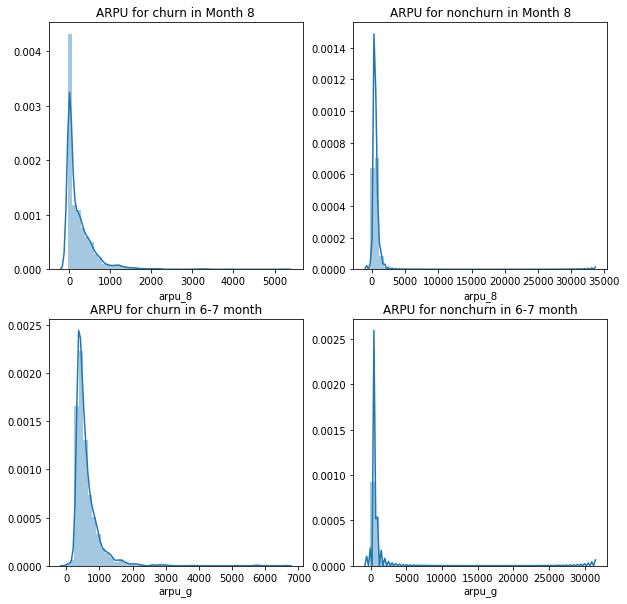

In [22]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('ARPU for churn in Month 8')
sns.distplot(cdf.arpu_8)

plt.subplot(222)
plt.title('ARPU for nonchurn in Month 8')
sns.distplot(ncdf.arpu_8)

plt.subplot(223)
plt.title('ARPU for churn in 6-7 month')
sns.distplot(cdf.arpu_g)

plt.subplot(224)
plt.title('ARPU for nonchurn in 6-7 month')
sns.distplot(ncdf.arpu_g)

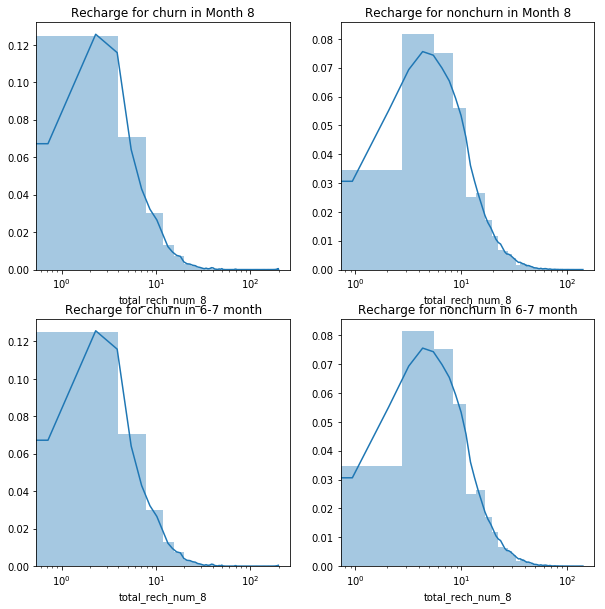

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Recharge for churn in Month 8')
sns.distplot(cdf.total_rech_num_8)
plt.xscale('log')

plt.subplot(222)
plt.title('Recharge for nonchurn in Month 8')
sns.distplot(ncdf.total_rech_num_8)
plt.xscale('log')

plt.subplot(223)
plt.title('Recharge for churn in 6-7 month')
sns.distplot(cdf.total_rech_num_8)
plt.xscale('log')

plt.subplot(224)
plt.title('Recharge for nonchurn in 6-7 month')
sns.distplot(ncdf.total_rech_num_8)
plt.xscale('log')

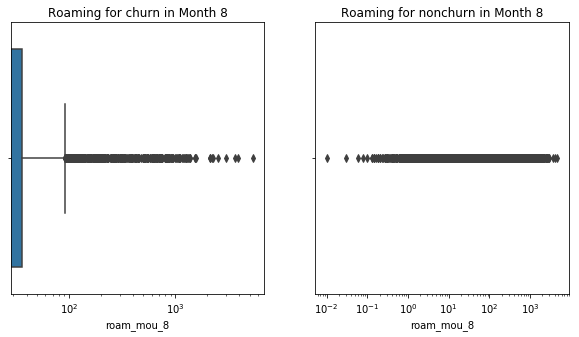

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Roaming for churn in Month 8')
sns.boxplot(cdf.roam_mou_8)
plt.xscale('log')

plt.subplot(122)
plt.title('Roaming for nonchurn in Month 8')
sns.boxplot(ncdf.roam_mou_8)
plt.xscale('log')

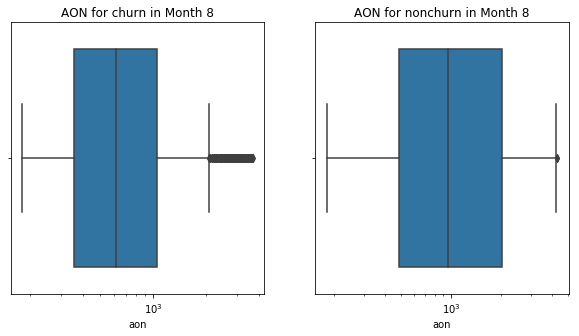

In [25]:

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('AON for churn in Month 8')
sns.boxplot(cdf.aon)
plt.xscale('log')

plt.subplot(122)
plt.title('AON for nonchurn in Month 8')
sns.boxplot(ncdf.aon)
plt.xscale('log')

- while there is difference in the AON between churn and non churn population same was not found to be significant predictor

### Dropping columns further including Target variable and ones that are non-numeric.

### Performing STANDARDIZATION to eliminate disparity in the values

In [26]:
print(hvcdf.shape)
hvcdf_x=hvcdf.drop(['mobile_number','churn','date_of_last_rech_8','std_og_t2c_mou_8','std_og_t2c_mou_6-7'],axis=1)
hvcdf_nx= hvcdf_x-hvcdf_x.mean()/hvcdf_x.std()

(30011, 55)


# PART-2

### Performing PCA for Feature reduction as it would eliminate highly correlated values , noise and further bring up the possibility of latent variables

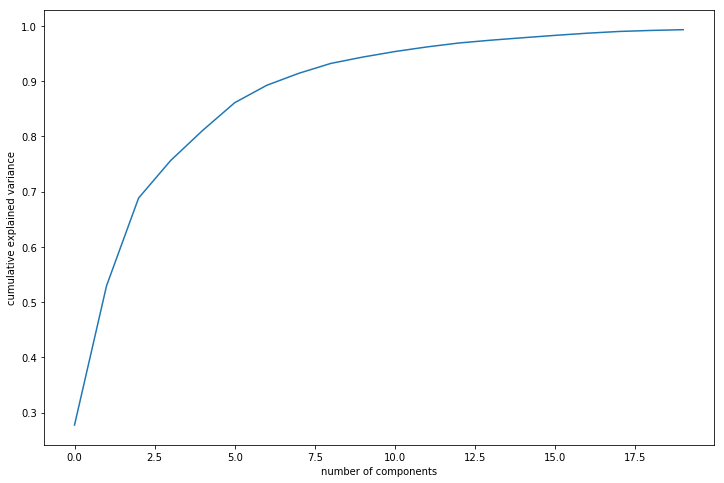

(9004, 20)

In [27]:
X=hvcdf_nx
y=hvcdf['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

pca = PCA(svd_solver='randomized',n_components=20,random_state=42)
pca.fit(X_train)


#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

df_test = pca.transform(X_test)
df_test.shape

In [28]:
df_train = pca.fit_transform(X_train)
# df_train.shape

df_test = pca.transform(X_test)
# df_test.shape

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score,f1_score,roc_auc_score,confusion_matrix

pca_log = LogisticRegression(class_weight ='balanced')
model_pca = pca_log.fit(df_train, y_train)
# X_test=pca.transform(X_test)
y_pred= pca_log.predict(df_test)


print(metrics.accuracy_score( y_test, y_pred))
print(metrics.precision_score( y_test, y_pred))
print(metrics.f1_score( y_test, y_pred))
print(metrics.roc_auc_score( y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

0.8071968014215904
0.28628318584070794
0.427062706270627
0.8221823355172881


array([[6621, 1613],
       [ 123,  647]])

In [29]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4],'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],'PC12':pca.components_[11],'PC12':pca.components_[11],'PC13':pca.components_[12],'PC14':pca.components_[13], 'PC15':pca.components_[14], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC10,PC11,PC12,PC13,PC14,PC15,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,arpu_8,0.271278,0.056205,0.191697,-0.076211,-0.179537,0.039230,-0.071295,0.092269,0.024854,0.320316,0.294787,0.046722,0.041071,0.023389,-0.019946
1,onnet_mou_8,0.213674,-0.413656,-0.164180,-0.448052,0.101738,-0.128662,-0.042296,-0.056722,-0.038737,-0.390527,0.414330,0.055410,-0.053531,0.059400,-0.008131
2,offnet_mou_8,0.253584,-0.408163,0.181717,0.459036,0.108928,-0.162559,-0.049481,-0.042660,0.002554,0.275715,-0.225800,-0.388534,-0.057280,0.077469,-0.010874
3,total_rech_num_8,0.002688,-0.004176,0.004665,-0.002806,-0.016831,0.000475,-0.000604,-0.000178,-0.001444,0.000805,0.003311,-0.002756,0.000969,0.001562,0.002347
4,total_rech_amt_8,0.321155,0.126530,0.416734,-0.183353,-0.010391,-0.048689,0.068787,0.109063,0.027429,0.389182,0.368286,0.048185,0.056259,0.026735,-0.024454


### Observations/Inference from PCA:-
1. We see that although the accuracy and the area under the ROC curve shows resonably high values,we see a lower preicison value at 28% and a very moderate F1 score at 42%.
2. We have captured 95% infromation value as shown in the Graph above.
3. PCA components clearly shows maximum information value can be derived from  8th month features related to minutes of usage, total numer of recharge and total recharge



# PART -3

- Building a model using Logistic Regression after PCA.Given the business objective and the use case,Logictic Regression is an appropriate choice to predict the churn

In [30]:
# help(train_test_split)
X=hvcdf_nx
y=hvcdf['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(metrics.accuracy_score( y_test, y_pred))
print(metrics.precision_score( y_test, y_pred))
print(metrics.f1_score( y_test, y_pred))
print(metrics.roc_auc_score( y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

0.8150821856952466
0.29538180155464105
0.43692932025701725
0.8259051004861061


array([[6693, 1541],
       [ 124,  646]])

### USING RFE for feature selection.

In [31]:
estimator = LogisticRegression(class_weight='balanced')
rfe = RFE(estimator, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [32]:
X= pd.DataFrame(rfe.ranking_, columns=['rank'])
X['col']=X_train.columns
X=X.loc[(X['rank']==1),:]
rfelist =list(X.col)
rfelist

['onnet_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'fb_user_8',
 'total_rech_num_g',
 'date_of_last_rech_g',
 'total_rech_data_g',
 'night_pck_user_g',
 'monthly_2g_g',
 'fb_user_g',
 'loc_og_t2c_mou_6-7',
 'voice_mou_8',
 'monthly_2_3g_8',
 'sachet_2_3g_8',
 'monthly_2_3g_g',
 'sachet_2_3g_g']

In [33]:
X=hvcdf_nx[rfelist]
y=hvcdf['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(metrics.accuracy_score( y_test, y_pred))
print(metrics.precision_score( y_test, y_pred))
print(metrics.f1_score( y_test, y_pred))
print(metrics.roc_auc_score( y_test, y_pred))
metrics.confusion_matrix(y_test, y_pred)

0.7728787205686362
0.24891689641591178
0.3819885161680266
0.7945892703361734


array([[6327, 1907],
       [ 138,  632]])

# PART-3

## Building a model using Random Forest

In [34]:
X=hvcdf_nx
y=hvcdf['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(metrics.accuracy_score( y_test, predictions))
print(metrics.precision_score( y_test, predictions))
print(metrics.f1_score( y_test, predictions))
print(metrics.roc_auc_score( y_test, predictions))
metrics.confusion_matrix(y_test, predictions)

0.9378054198134163
0.7692307692307693
0.5172413793103449
0.689340050282484


array([[8144,   90],
       [ 470,  300]])

In [35]:
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 16, 2)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 16, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [36]:
scores = rf.cv_results_
pd.DataFrame(scores).head()
rf.best_params_
# plt.figure()
# plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training f1")
# plt.plot(scores["param_max_depth"], scores["mean_test_score"] , label="test f1")
# plt.xlabel("max_depth")
# plt.ylabel("f1")
# plt.legend()
# plt.show()

{'max_depth': 6}

In [37]:
rfc1 = RandomForestClassifier(class_weight='balanced', max_depth=4)
rfc1.fit(X_train,y_train)
predictions = rfc1.predict(X_test)
print(metrics.accuracy_score( y_test, predictions))
print(metrics.precision_score( y_test, predictions))
print(metrics.f1_score( y_test, predictions))
print(metrics.roc_auc_score( y_test, predictions))
metrics.confusion_matrix(y_test, predictions)

0.8866059529098178
0.4136269786648314
0.540710751237067
0.8385230387780789


array([[7382,  852],
       [ 169,  601]])

![title](Metrics.png)

__Observations and conclusions__
1. As shown in the table above Random forest with hyperparameter tuning gives best results
2. For evaluation we have given F1 Score maximum weightage given unbalanced population

__Recommendations__
1. Data usagage is one of the prime factor.
